<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/NLP_spam_classifier_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling==2.9

     |████████████████████████████████| 266kB 4.2MB/s 
     |████████████████████████████████| 3.1MB 30.5MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 604kB 40.6MB/s 
     |████████████████████████████████| 296kB 46.9MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=a2d1d473f5ccb63a443f2e8d9e6dd69897546dd688a0dca45fef20b6439d90fc
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df.groupby('spam').count()

,text
spam,
0,4360
1,1368


In [ ]:
df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: term project :  this is the list of p...    2
1     1368   1368  Subject: save your money buy getting this thin...    1

In [ ]:
spam = df[df['spam'] == 1]
ham = df[df['spam'] == 0]

In [ ]:
spam.sample(10)

,text,spam
1285,Subject: first - level designers available for...,1
1002,"Subject: from brand names to generics , from o...",1
641,"Subject: be informed , be prepared pandemic a...",1
140,Subject: software should be easy to use ! sev...,1
608,Subject: have you ever bought drugs online ? ...,1
1358,Subject: important 42745 start your own adul...,1
713,Subject: innovative and effective design for y...,1
1151,"Subject: localized software , all languages av...",1
123,Subject: look what sandy is doing in her dorm ...,1
239,"Subject: free ltc "" sales closers "" which vir...",1


In [ ]:
print(f'Spam rate is {round(np.sum(df["spam"]) / len(df),3)*100}%')

Spam rate is 23.9%


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


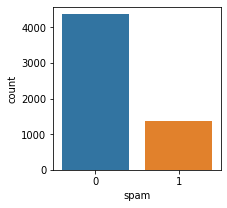

In [ ]:
plt.figure(figsize = (3, 3))
sns.countplot(df['spam'])
plt.show()

# count vectorizer

# sample data 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

sample_data = ['This is the first document.', 
               'This is the second document',
               'And this is the third one',
               'Is this the first document?']

In [ ]:
sample_data

['This is the first document.',
 'This is the second document',
 'And this is the third one',
 'Is this the first document?']

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(sample_data)

In [ ]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
print(vectorizer.inverse_transform(X))

[array(['this', 'is', 'the', 'first', 'document'], dtype='<U8'), array(['this', 'is', 'the', 'document', 'second'], dtype='<U8'), array(['this', 'is', 'the', 'and', 'third', 'one'], dtype='<U8'), array(['this', 'is', 'the', 'first', 'document'], dtype='<U8')]


In [ ]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

# spam df vectorized

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df_vectorizer = CountVectorizer()

In [ ]:
spamham_vectorized = df_vectorizer.fit_transform(df['text'])

In [ ]:
df_vectorizer.inverse_transform(spamham_vectorized[-3])

[array(['subject', 'your', 'is', 'to', 'the', 'of', 'and', 'good', 'will',
        'much', 'we', 'do', 'not', 'that', 'list', 'convenience', 'are',
        'in', 'all', 'you', 'with', 'for', 'this', 'have', 'at', 'our',
        'home', 'from', 'additional', 'fax', 'me', 'by', 'as', 'one',
        'day', 'on', '11', 'know', 'just', 'things', 'well', 'also',
        'needed', 'out', 'any', 'want', '10', 'following', 'us', 'next',
        '30', 'http', 'please', 'line', 'if', 'so', 'same', 'then', 'week',
        'very', 'times', 'corp', 'trying', 'thank', 'regards', 'contact',
        '49', 'web', 're', 'question', 'thanks', 'up', 'let', 'link', 'am',
        'soon', 'below', '00', 'html', 'office', '01', '31', 'work',
        'hope', 'tx', 'th', 'case', 'allow', 'still', '2000', 'university',
        'department', 'chair', 'mr', 'status', 'successful', 'po', 'box',
        'hour', 'update', 'questions', 'john', '0600', 'monday', 'coming',
        'interview', '54', 'drop', 'attempt', 'k

In [ ]:
df['text'].iloc[-3]

'Subject: re : enron case study update  wow ! all on the same day . that \' s super . thank you so very much . vince  is coming up to baylor on monday of next week and we will hash out our  question list then .  thanks  john  at 04 : 54 pm 11 / 6 / 00 - 0600 , you wrote :  > good afternoon john ,  >  > i just want to drop you a line to update you re : andy fastow . i have  > confirmed a one hour interview slot with mr . fastow in monday , december 4 th  > from  > 11 : 00 a . m . - noon . this is in addition to your schedule interviews with  > mr . lay and mr . skilling - outline below .  >  > if you have any questions , please do not hesitate to contact me at  > 713 - 853 - 5670 .  >  > regards ,  >  > cindy  >  >  > - - - - - forwarded by cindy derecskey / corp / enron on 11 / 06 / 2000 04 : 49 pm - - - - -  >  > cindy  > derecskey to : " john martin "  > cc : vince j  kaminski / hou / ect @ ect , christie patrick / hou / ect @ ect  > 10 / 31 / 2000 subject : re : enron case  study ( 

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample_text = df['text'][0]

In [ ]:
sample_text_no_punc = [i for i in sample_text if i not in string.punctuation]

In [ ]:
sample_text_no_punc = ''.join(sample_text_no_punc)

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[word for word in sample_text_no_punc.split()]

['Subject',
 'naturally',
 'irresistible',
 'your',
 'corporate',
 'identity',
 'lt',
 'is',
 'really',
 'hard',
 'to',
 'recollect',
 'a',
 'company',
 'the',
 'market',
 'is',
 'full',
 'of',
 'suqgestions',
 'and',
 'the',
 'information',
 'isoverwhelminq',
 'but',
 'a',
 'good',
 'catchy',
 'logo',
 'stylish',
 'statlonery',
 'and',
 'outstanding',
 'website',
 'will',
 'make',
 'the',
 'task',
 'much',
 'easier',
 'we',
 'do',
 'not',
 'promise',
 'that',
 'havinq',
 'ordered',
 'a',
 'iogo',
 'your',
 'company',
 'will',
 'automaticaily',
 'become',
 'a',
 'world',
 'ieader',
 'it',
 'isguite',
 'ciear',
 'that',
 'without',
 'good',
 'products',
 'effective',
 'business',
 'organization',
 'and',
 'practicable',
 'aim',
 'it',
 'will',
 'be',
 'hotat',
 'nowadays',
 'market',
 'but',
 'we',
 'do',
 'promise',
 'that',
 'your',
 'marketing',
 'efforts',
 'will',
 'become',
 'much',
 'more',
 'effective',
 'here',
 'is',
 'the',
 'list',
 'of',
 'clear',
 'benefits',
 'creativenes

In [ ]:
sample_text_no_punc_no_stop = [word for word in sample_text_no_punc.split() if word not in stopwords.words('english')]

In [ ]:
def mail_cleaner(mail):

    # remove punctuation
    chars_no_punc = [char for char in mail if char not in string.punctuation] 

    # join to make sentence out of words    
    sentences_no_punc = ''.join(chars_no_punc) 

    # remove stopwords
    mail_clean = [word for word in sentences_no_punc.split() if word not in stopwords.words('english')]
    return mail_clean



In [ ]:
df['clean_text'] = df['text'].apply(mail_cleaner)

In [ ]:
df

,text,spam,clean_text
0,Subject: naturally irresistible your corporate...,1,"[Subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,"[Subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,"[Subject, unbelievable, new, homes, made, easy..."
3,Subject: 4 color printing special request add...,1,"[Subject, 4, color, printing, special, request..."
4,"Subject: do not have money , get software cds ...",1,"[Subject, money, get, software, cds, software,..."
...,...,...,...
5723,Subject: re : research and development charges...,0,"[Subject, research, development, charges, gpg,..."
5724,"Subject: re : receipts from visit jim , than...",0,"[Subject, receipts, visit, jim, thanks, invita..."
5725,Subject: re : enron case study update wow ! a...,0,"[Subject, enron, case, study, update, wow, day..."
5726,"Subject: re : interest david , please , call...",0,"[Subject, interest, david, please, call, shirl..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(analyzer = mail_cleaner) # can call the function to remove stopwords and punctuation
mails_vectorized = vectorizer.fit_transform(df['text'])

In [ ]:
print(mails_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
print(vectorizer.get_feature_names()[-100:])

['zimno', 'zin', 'zinc', 'zingales', 'zingalesuniversity', 'zip', 'zipcode', 'ziplink', 'ziplip', 'zipmail', 'zipped', 'zipper', 'zipter', 'zisman', 'ziyong', 'zkcc', 'zkhokher', 'zl', 'zlotowkach', 'zlotych', 'zlotys', 'zlozyli', 'zlu', 'zmail', 'zmian', 'zmienilo', 'zmin', 'zmolek', 'zmsx', 'zn', 'znac', 'znacza', 'znacznie', 'znajomych', 'znakomitych', 'znalazlam', 'znalezc', 'znalezlismy', 'znam', 'znana', 'zndnioays', 'znow', 'znowu', 'zobaczenie', 'zoch', 'zoe', 'zofia', 'zoko', 'zoloftpain', 'zombie', 'zonal', 'zone', 'zones', 'zongo', 'zonings', 'zonline', 'zoo', 'zoolant', 'zoraidaguerra', 'zorganizowalem', 'zosta', 'zostal', 'zou', 'zrobic', 'zrobilem', 'zt', 'ztvwo', 'zu', 'zucha', 'zuerich', 'zufferli', 'zuid', 'zulie', 'zulkifli', 'zum', 'zuma', 'zunaechst', 'zunf', 'zungenakrobatik', 'zur', 'zurich', 'zusaetzlich', 'zustellstatus', 'zuyw', 'zuzana', 'zwabic', 'zwischen', 'zwlaszcza', 'zwrocic', 'zwwyw', 'zwzm', 'zxghlajf', 'zyban', 'zyc', 'zygoma', 'zymg', 'zzmacmac', 'zz

In [ ]:
mails_vectorized.shape

(5728, 37229)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
y = df['spam'].values
X = mails_vectorized

# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)
print(X_train.shape, '\n', X_test.shape, '\n', y_train.shape, '\n', y_test.shape)

(4296, 37229) 
 (1432, 37229) 
 (4296,) 
 (1432,)


In [ ]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

[]

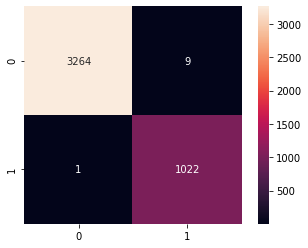

In [ ]:
cm_train = confusion_matrix(y_train, model.predict(X_train))
sns.heatmap(cm_train, annot = True, square = True, fmt = '')
plt.plot()

[]

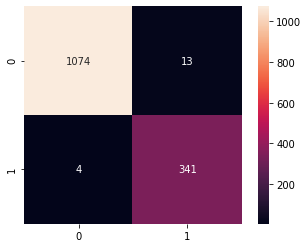

In [ ]:
cm_test = confusion_matrix(y_test, y_preds)
sns.heatmap(cm_test, annot = True, square = True, fmt = '')
plt.plot()

In [ ]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
 
# just send in all your docs here
fitted_vectorizer=tfidf_vectorizer.fit(docs)
tfidf_vectorizer_vectors=fitted_vectorizer.transform(docs)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vec = TfidfVectorizer(analyzer = mail_cleaner)
tfidf_vecd = tfidf_vec.fit_transform(df['text'])

tfidf_vecd

<5728x37229 sparse matrix of type '<class 'numpy.float64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_vecd.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_vecd.shape

(5728, 37229)

In [ ]:
pd.DataFrame(tfidf_vecd.toarray()[0]).sort_values(by=0)

,0
0,0.000000
24802,0.000000
24803,0.000000
24804,0.000000
24805,0.000000
...,...
12828,0.157486
9821,0.159018
9296,0.162018
27101,0.194484


In [ ]:
X2 = tfidf_vecd

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = .25)

print(X2_train.shape, '\n', X2_test.shape, '\n', y2_train.shape, '\n', y2_test.shape)

(4296, 37229) 
 (1432, 37229) 
 (4296,) 
 (1432,)


In [ ]:
model2 = MultinomialNB()
model2.fit(X2_train, y2_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

[]

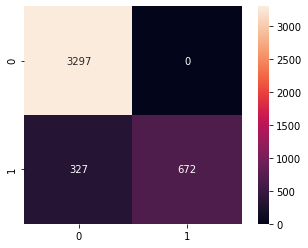

In [ ]:
cm2_train = confusion_matrix(y2_train, model2.predict(X2_train))

sns.heatmap(cm2_train, square = True, annot = True, fmt = '')
plt.plot()

[]

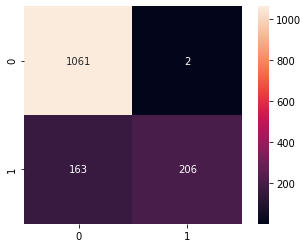

In [ ]:
cm2_test = confusion_matrix(y2_test, model2.predict(X2_test))

sns.heatmap(cm2_test, annot = True, square = True, fmt = '')
plt.plot()